In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
df_ROSF = pd.read_csv('../../datasets/RecurrenceOfSurgery_Final.csv')
df_ROSF[:2]

,Unnamed: 0.1,Unnamed: 0,환자ID,신장,체중,연령,성별,Large Lymphocyte,우울증여부,종양진행여부,...,디스크위치,척추이동척도,척추전방위증,수술시간,수술실패여부,수술기법,흡연여부,Instability,혈액형,입원기간
0,0,0,1PT,163,60.3,66,2,22.8,0,0,...,4,Down,0,68.0,0,TELD,0,0,RH+A,2
1,1,1,2PT,171,71.7,47,1,44.9,0,0,...,4,Up,0,31.0,0,TELD,0,0,RH+A,1


In [3]:
df_ROSF.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '환자ID', '신장', '체중', '연령', '성별',
       'Large Lymphocyte', '우울증여부', '종양진행여부', '재발여부', '디스크단면적', '디스크위치',
       '척추이동척도', '척추전방위증', '수술시간', '수술실패여부', '수술기법', '흡연여부', 'Instability',
       '혈액형', '입원기간'],
      dtype='object')

## SA
- 입원기간을 목표변수로 잡았음.
    - 입원기간이 1~4주가 통상적 입원기간이고 5주 이상이 환자의 특이사항의 입원기간이라 판단함.
    
- '연령','Large Lymphocyte','종양진행여부','디스크단면적','척추이동척도','수술시간','수술기법','Instability','혈액형'

#### 연령-입원기간
- 연속-연속 scatter, hitmap
- 연령은 입원기간에 영향을 미치지 않는 것으로 보여짐. 
    - 입원기간 4주 이하에서 50대가 많이 입원하는것으로 보여짐
    - 입원기간 4주 초과에서 오히려 30대, 60대 많이 입원하는 것으로 보여짐 (직업 or 생활환경에 영향을 많이 받았을거같은..)

In [4]:
## 입원기간의 value count로 했을때 범위를 끊어서 분석하고 싶음. 
df_ROSF['입원기간'].describe()

count    1894.000000
mean        1.736536
std         2.344085
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        51.000000
Name: 입원기간, dtype: float64

In [5]:
Q1_in = df_ROSF['입원기간'].describe()['25%']
Q3_in = df_ROSF['입원기간'].describe()['75%']
IQR_in = Q3_in-Q1_in

In [6]:
up = Q3_in + 1.5 *IQR_in
down = Q1_in - 1.5 *IQR_in
down, up

(-0.5, 3.5)

In [7]:
## 입원기간 4주 이하
condition = (df_ROSF['입원기간'] <= 4)
df_ROSF_in = df_ROSF[condition]

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


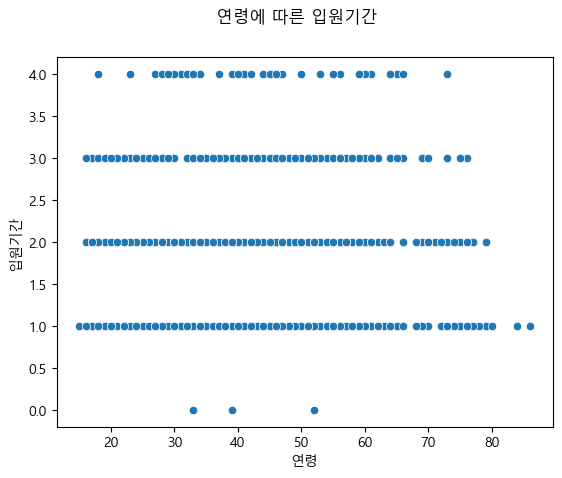

In [8]:
sns.scatterplot(data=df_ROSF_in, x='연령', y='입원기간')
plt.suptitle('연령에 따른 입원기간')
plt.show()

In [9]:
df_ROSF_in[['입원기간', '연령']].corr()

,입원기간,연령
입원기간,1.000000,0.068691
연령,0.068691,1.000000


C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

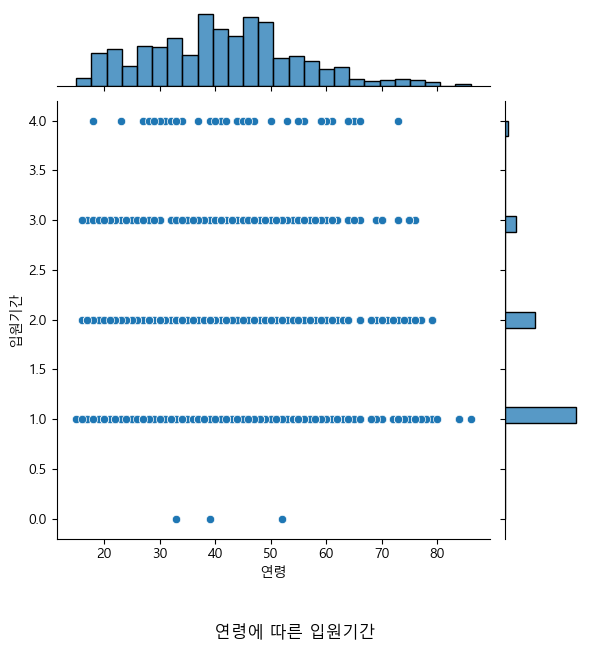

In [10]:
sns.jointplot(data=df_ROSF_in, x='연령', y='입원기간',)
plt.suptitle('연령에 따른 입원기간', y=-0.05)
plt.show()

In [11]:
df_ROSF_in_pivot = pd.pivot_table(data=df_ROSF_in, index='연령',  aggfunc=len)
df_ROSF_in_pivot['4주이하입원연령추세']=df_ROSF_in_pivot.index

In [12]:
df_ROSF_in_pivot

,Instability,Large Lymphocyte,Unnamed: 0,Unnamed: 0.1,디스크단면적,디스크위치,성별,수술기법,수술시간,수술실패여부,...,입원기간,재발여부,종양진행여부,척추이동척도,척추전방위증,체중,혈액형,환자ID,흡연여부,4주이하입원연령추세
연령,,,,,,,,,,,,,,,,,,,,,
15,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,15
16,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,16
17,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,17
18,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,18
19,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,78
79,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,79
80,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,80


C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

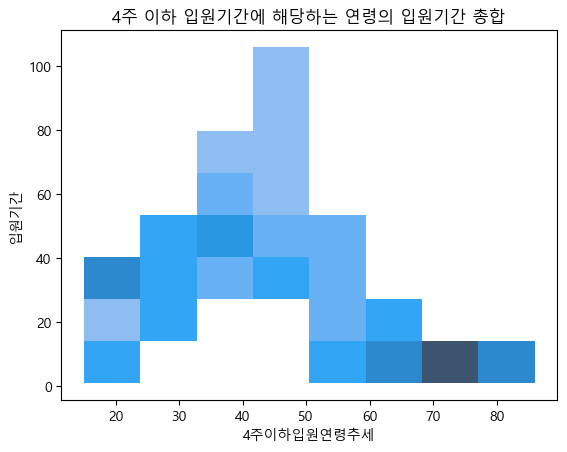

In [13]:
sns.histplot(data=df_ROSF_in_pivot, x='4주이하입원연령추세', y='입원기간')
plt.title('4주 이하 입원기간에 해당하는 연령의 입원기간 총합')
plt.show()

In [14]:
df_ROSF_in_pivot[['입원기간', '4주이하입원연령추세']].corr()

,입원기간,4주이하입원연령추세
입원기간,1.000000,-0.440863
4주이하입원연령추세,-0.440863,1.000000


In [15]:
## 입원기간 4주 초과 
conditions = (df_ROSF['입원기간'] > 4)
df_ROSF_inover = df_ROSF[conditions]

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

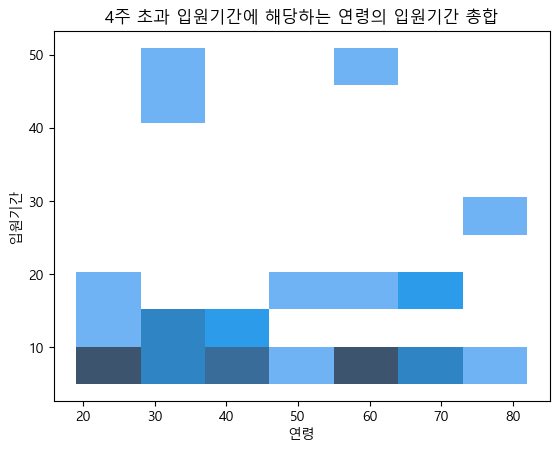

In [16]:
sns.histplot(data=df_ROSF_inover, x='연령', y='입원기간')
plt.title('4주 초과 입원기간에 해당하는 연령의 입원기간 총합')
plt.show()

In [17]:
df_ROSF_inover[['입원기간', '연령']].corr()

,입원기간,연령
입원기간,1.000000,0.028159
연령,0.028159,1.000000


#### Large Lymphocyte-입원기간
- 연속-연속?
- 정상범위 1,500-4,500 / μL (실제 data: 44.9-5.4 : 단위는 *10^2)

- 림프구 수가 적으면 다른 질병에 걸릴 확률이 높아 입원기간이 길어질 것으로 예상됨
- 그룹1: 입원기간 4주 이하 / 그룹 2: 입원기간 4주 초과
- 조건 1: 정상범위보다 미만인 경우, 조건 2: 정상범위보다 초과인 경우
- 림프구 수와 입원기간은 연관성이 보이지 않음. 
        - 림프수 중앙값 이상만 filter해도 입원기간과는 무관해보임. 

In [18]:
df_ROSF['Large Lymphocyte'].describe()

count    1894.000000
mean       39.270750
std        13.675874
min         0.000000
25%        30.700000
50%        40.200000
75%        48.600000
max        89.000000
Name: Large Lymphocyte, dtype: float64

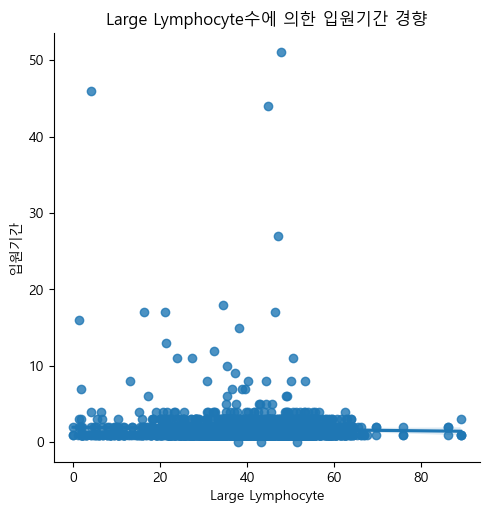

In [19]:
sns.lmplot(data=df_ROSF, x='Large Lymphocyte', y='입원기간',)
plt.title('Large Lymphocyte수에 의한 입원기간 경향')
plt.show()

In [20]:
df_ROSF[['Large Lymphocyte','입원기간']].corr()

,Large Lymphocyte,입원기간
Large Lymphocyte,1.000000,-0.034671
입원기간,-0.034671,1.000000


In [21]:
Q1_L = df_ROSF['Large Lymphocyte'].describe()['25%']
Q3_L = df_ROSF['Large Lymphocyte'].describe()['75%']
QM_L = df_ROSF['Large Lymphocyte'].describe()['50%']
IQR_L = Q3_L-Q1_L
Q1_L, Q3_L , IQR_L, QM_L

(30.7, 48.6, 17.900000000000002, 40.2)

In [22]:
up_L = Q3_L + 1.5 *IQR_L
down_L = Q1_L - 1.5 *IQR_L
down_L, up_L

(3.849999999999998, 75.45)

In [23]:
## 조건1: 정상수치 최소보다 낮은 경우 15(*10^2)미만 
condition_L=(df_ROSF['Large Lymphocyte'] < 15.0)
df_ROSF_L = df_ROSF[condition_L]
df_ROSF_L

,Unnamed: 0.1,Unnamed: 0,환자ID,신장,체중,연령,성별,Large Lymphocyte,우울증여부,종양진행여부,...,디스크위치,척추이동척도,척추전방위증,수술시간,수술실패여부,수술기법,흡연여부,Instability,혈액형,입원기간
6,6,6,7PT,175,74.8,47,1,4.2,0,0,...,4,Down,0,7.0,0,TELD,0,0,RH+O,1
45,45,45,46PT,160,59.3,77,2,10.5,0,0,...,4,Middle,0,121.0,0,TELD,0,0,RH+AB,1
96,96,96,97PT,161,59.7,37,2,6.0,0,0,...,4,Middle,0,61.0,0,TELD,0,0,RH+A,1
126,126,126,127PT,163,60.4,43,2,6.7,0,0,...,3,Middle,0,54.0,0,TELD,1,0,RH+O,3
140,140,140,141PT,170,70.8,33,1,9.5,0,0,...,4,Up,0,45.0,0,TELD,1,0,RH+O,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,1811,1811,1812PT,183,75.0,29,1,14.7,0,0,...,5,Middle,0,40.0,0,TELD,0,0,RH+O,1
1815,1815,1815,1816PT,167,58.0,36,2,2.1,0,0,...,4,Middle,0,40.0,0,TELD,0,0,RH+B,1
1837,1837,1837,1838PT,174,72.0,27,1,0.0,0,0,...,5,Middle,0,30.0,0,TELD,0,0,RH+AB,1
1873,1873,1873,1874PT,171,61.0,33,1,6.4,0,0,...,4,Middle,1,45.0,0,NaN,1,0,RH+A,4


In [24]:
df_ROSF_L[['Large Lymphocyte','입원기간']].corr()

,Large Lymphocyte,입원기간
Large Lymphocyte,1.000000,-0.127449
입원기간,-0.127449,1.000000


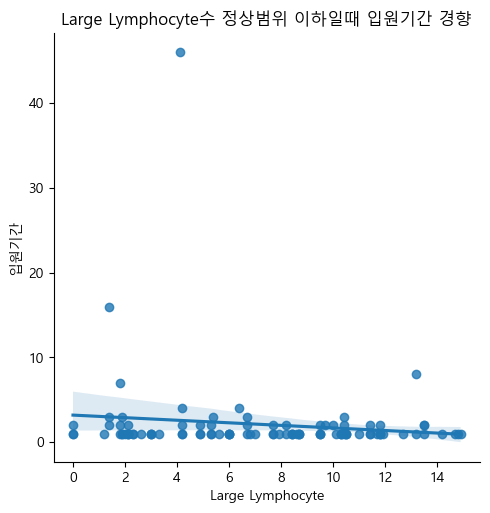

In [25]:
sns.lmplot(data=df_ROSF_L, x='Large Lymphocyte', y='입원기간',)
plt.title('Large Lymphocyte수 정상범위 이하일때 입원기간 경향')
plt.show()

In [26]:
## 조건 2: 정상범위 초과 45(*10^2)초과
condition_H=(df_ROSF['Large Lymphocyte'] > 45.0)
df_ROSF_H = df_ROSF[condition_H]
df_ROSF_H

,Unnamed: 0.1,Unnamed: 0,환자ID,신장,체중,연령,성별,Large Lymphocyte,우울증여부,종양진행여부,...,디스크위치,척추이동척도,척추전방위증,수술시간,수술실패여부,수술기법,흡연여부,Instability,혈액형,입원기간
2,2,2,3PT,178,77.1,39,1,53.0,0,0,...,4,Down,0,78.0,0,TELD,0,0,RH+B,1
3,3,3,4PT,174,74.2,40,1,54.7,0,0,...,4,Down,0,73.0,0,TELD,0,0,RH+O,1
4,4,4,5PT,183,80.7,42,1,53.8,0,0,...,4,Up,0,29.0,0,TELD,0,0,RH+A,2
8,8,8,9PT,168,69.2,52,1,89.0,0,0,...,4,Down,0,49.0,0,TELD,1,0,RH+A,1
11,11,11,12PT,162,64.9,65,1,53.2,0,0,...,4,Middle,0,49.0,0,TELD,0,0,RH+O,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1869,1869,1870PT,170,77.0,49,1,51.1,0,0,...,4,Middle,0,60.0,0,NaN,0,1,RH+AB,3
1871,1871,1871,1872PT,177,82.0,47,1,51.1,0,0,...,4,Extremely down,0,75.0,0,NaN,0,0,RH+B,3
1886,1886,1886,1887PT,163,56.0,34,2,49.9,0,0,...,5,Down,0,30.0,0,NaN,0,0,RH+O,2
1887,1887,1887,1888PT,163,56.0,34,2,49.9,0,0,...,5,Down,0,75.0,0,NaN,0,0,RH+B,2


In [27]:
df_ROSF_H[['Large Lymphocyte','입원기간']].corr()

,Large Lymphocyte,입원기간
Large Lymphocyte,1.000000,-0.065859
입원기간,-0.065859,1.000000


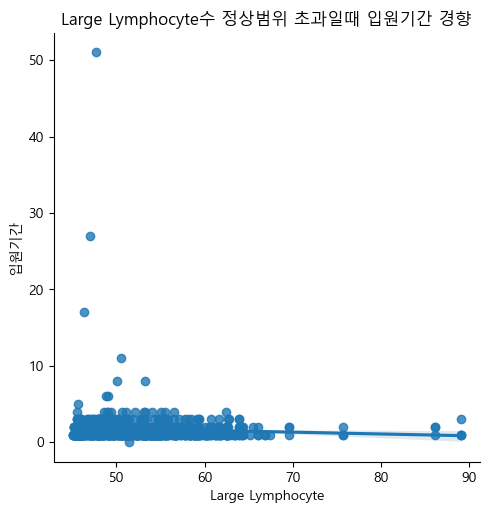

In [28]:
sns.lmplot(data=df_ROSF_H, x='Large Lymphocyte', y='입원기간',)
plt.title('Large Lymphocyte수 정상범위 초과일때 입원기간 경향')
plt.show()

#### 종양진행여부-입원기간
- 범주-연속
- 종양 진행이 없을때보다 있을 때 입원기간이 조금 늘어나는 것으로 보이나 이의 값의 variation이 크므로 검증이 필수



In [29]:
df_ROSF['종양진행여부'].value_counts()

종양진행여부
0    1888
1       6
Name: count, dtype: int64

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


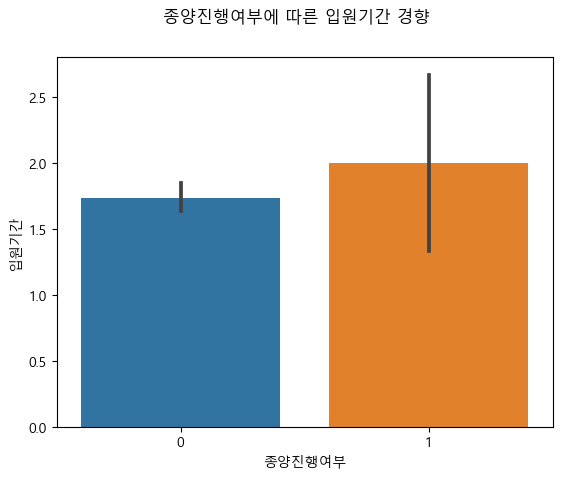

In [30]:
sns.barplot(data=df_ROSF, x='종양진행여부', y='입원기간', )
plt.suptitle('종양진행여부에 따른 입원기간 경향')
plt.show()

#### 디스크 단면적-입원기간
- 연속-연속

In [31]:
df_ROSF['디스크단면적'].describe()

count    1893.000000
mean     1989.788774
std       314.478436
min      1145.800000
25%      1777.000000
50%      1985.500000
75%      2178.500000
max      3214.200000
Name: 디스크단면적, dtype: float64

In [32]:
Q1_D = df_ROSF['디스크단면적'].describe()['25%']
Q3_D = df_ROSF['디스크단면적'].describe()['75%']
IQR_D = Q3_D-Q1_D
Q1_D, Q3_D , IQR_D

(1777.0, 2178.5, 401.5)

In [33]:
up_D = Q3_D + 1.5 *IQR_L
down_D = Q1_D - 1.5 *IQR_L
down_D, up_D

(1750.15, 2205.35)

In [34]:
condition_D = (down_D <= df_ROSF['디스크단면적']) & (df_ROSF['디스크단면적']<= up_D)
df_ROSF_D = df_ROSF[condition_D]

In [35]:
df_ROSF_D

,Unnamed: 0.1,Unnamed: 0,환자ID,신장,체중,연령,성별,Large Lymphocyte,우울증여부,종양진행여부,...,디스크위치,척추이동척도,척추전방위증,수술시간,수술실패여부,수술기법,흡연여부,Instability,혈액형,입원기간
0,0,0,1PT,163,60.3,66,2,22.8,0,0,...,4,Down,0,68.0,0,TELD,0,0,RH+A,2
1,1,1,2PT,171,71.7,47,1,44.9,0,0,...,4,Up,0,31.0,0,TELD,0,0,RH+A,1
3,3,3,4PT,174,74.2,40,1,54.7,0,0,...,4,Down,0,73.0,0,TELD,0,0,RH+O,1
4,4,4,5PT,183,80.7,42,1,53.8,0,0,...,4,Up,0,29.0,0,TELD,0,0,RH+A,2
5,5,5,6PT,164,60.8,60,2,28.5,0,0,...,4,Down,0,47.0,0,TELD,1,0,RH+AB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,1884,1884,1885PT,156,52.0,56,2,30.7,0,0,...,5,Middle,0,50.0,0,NaN,1,0,RH+A,8
1886,1886,1886,1887PT,163,56.0,34,2,49.9,0,0,...,5,Down,0,30.0,0,NaN,0,0,RH+O,2
1887,1887,1887,1888PT,163,56.0,34,2,49.9,0,0,...,5,Down,0,75.0,0,NaN,0,0,RH+B,2
1890,1890,1890,1891PT,157,59.0,42,2,30.8,0,0,...,4,Down,0,20.0,0,NaN,0,0,RH+B,4


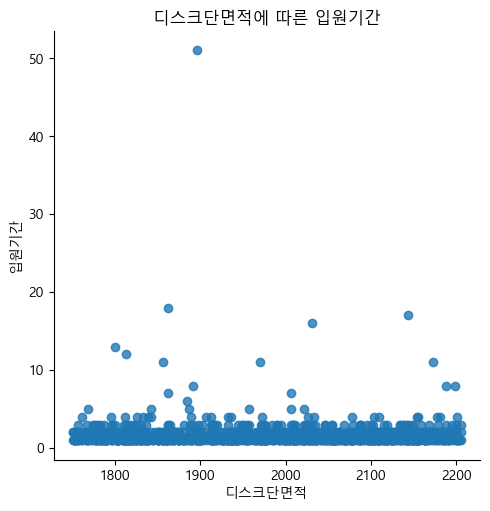

In [36]:
sns.lmplot(data=df_ROSF_D, x='디스크단면적', y='입원기간',)
plt.title('디스크단면적에 따른 입원기간')
plt.show()

In [37]:
df_ROSF_D[['디스크단면적','입원기간']].corr()

,디스크단면적,입원기간
디스크단면적,1.000000,-0.011314
입원기간,-0.011314,1.000000


#### 척추이동척도-입원기간
- 범주-연속

In [38]:
df_ROSF['척추이동척도'].value_counts()

척추이동척도
Middle            1260
Down               513
Up                  65
Extremely down      40
Extremely up        16
Name: count, dtype: int64

In [39]:
df_ROSF_M=pd.pivot_table(data=df_ROSF, index='척추이동척도', aggfunc=len)
df_ROSF_M['척추이동'] = df_ROSF_M.index
df_ROSF_M

,Instability,Large Lymphocyte,Unnamed: 0,Unnamed: 0.1,디스크단면적,디스크위치,성별,수술기법,수술시간,수술실패여부,...,우울증여부,입원기간,재발여부,종양진행여부,척추전방위증,체중,혈액형,환자ID,흡연여부,척추이동
척추이동척도,,,,,,,,,,,,,,,,,,,,,
Down,513,513,513,513,513,513,513,513,513,513,...,513,513,513,513,513,513,513,513,513,Down
Extremely down,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,Extremely down
Extremely up,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,Extremely up
Middle,1260,1260,1260,1260,1260,1260,1260,1260,1260,1260,...,1260,1260,1260,1260,1260,1260,1260,1260,1260,Middle
Up,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,Up


C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


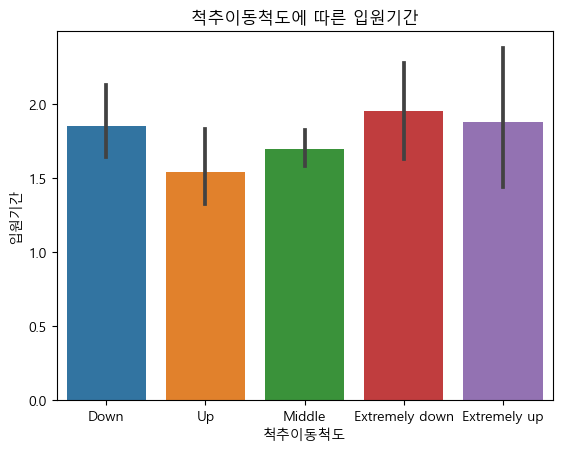

In [40]:
sns.barplot(data=df_ROSF, x='척추이동척도', y='입원기간')
plt.title('척추이동척도에 따른 입원기간')
plt.show()

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


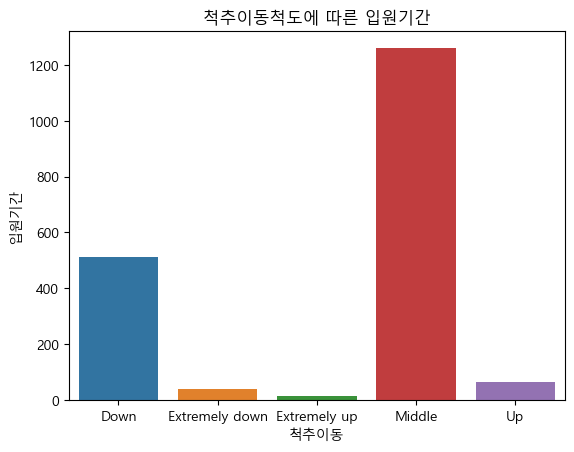

In [41]:
sns.barplot(data=df_ROSF_M, x='척추이동', y='입원기간')
plt.title('척추이동척도에 따른 입원기간')
plt.show()

#### 수술시간-입원기간
- 연속-연속

In [42]:
df_ROSF['수술시간'].describe()

count    1840.000000
mean       62.066304
std        24.994615
min         5.000000
25%        45.000000
50%        60.000000
75%        77.000000
max       220.000000
Name: 수술시간, dtype: float64

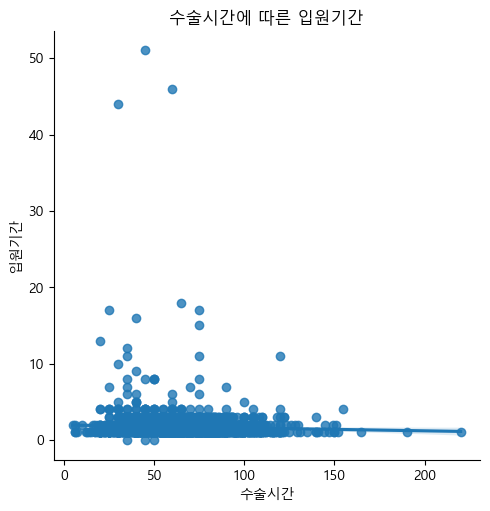

In [43]:
sns.lmplot(data=df_ROSF, x='수술시간', y='입원기간',)
plt.title('수술시간에 따른 입원기간')
plt.show()

In [44]:
df_ROSF[['수술시간','입원기간']].corr()

,수술시간,입원기간
수술시간,1.00000,-0.04194
입원기간,-0.04194,1.00000


#### 수술기법-입원기간
- 범주-연속

In [45]:
df_ROSF[['수술기법']].value_counts()

수술기법
TELD    1673
IELD     140
Name: count, dtype: int64

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, '수술기법에 따른 입원기간 경향')

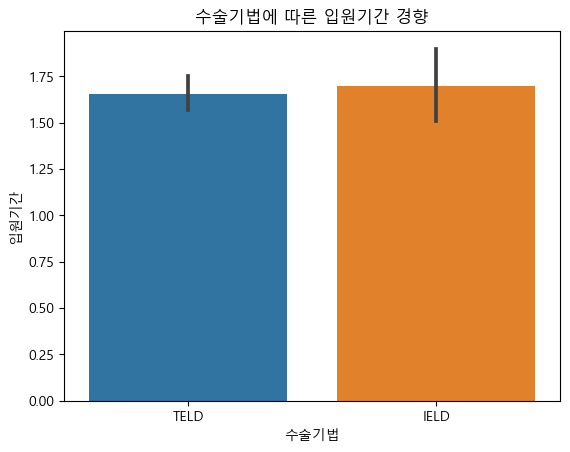

In [46]:
sns.barplot(data=df_ROSF, x='수술기법', y='입원기간')
plt.title('수술기법에 따른 입원기간 경향')

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, '수술기법에 따른 수술시간')

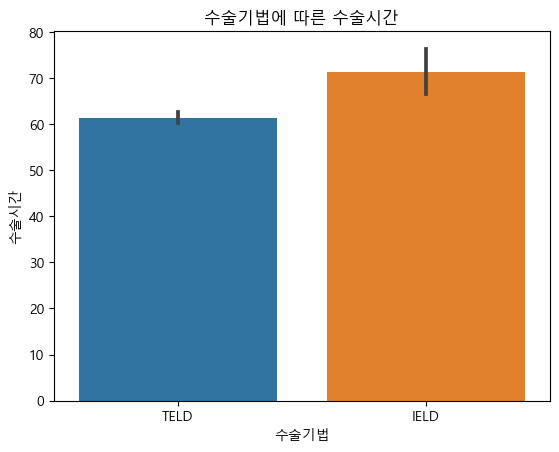

In [47]:
## 수술기법-수술시간 관계
sns.barplot(data=df_ROSF, x='수술기법', y='수술시간')
plt.title('수술기법에 따른 수술시간')

In [48]:
# 'TELD'를 0으로, 'IELD'를 1로 바꾸기
df_ROSF['수술기법'] = df_ROSF['수술기법'].replace({'TELD': 0, 'IELD': 1})

In [49]:
df_ROSF[['수술기법','입원기간']].corr()

,수술기법,입원기간
수술기법,1.000000,0.006254
입원기간,0.006254,1.000000


#### Instability-입원기간
- 범주-연속

In [50]:
df_ROSF[['Instability']].value_counts()

Instability
0              1817
1                77
Name: count, dtype: int64

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, '척추안정성여부에 따른 입원기간 경향')

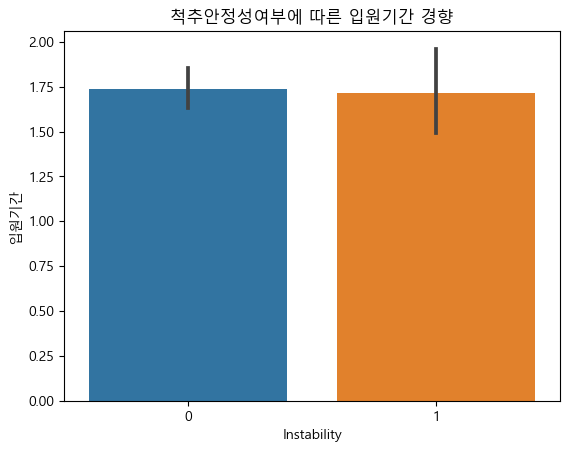

In [51]:
sns.barplot(data=df_ROSF, x='Instability', y='입원기간')
plt.title('척추안정성여부에 따른 입원기간 경향')

#### 혈액형-입원기간
- 범주-연속

In [52]:
df_ROSF[['혈액형']].value_counts()

혈액형  
RH+A     688
RH+O     532
RH+B     476
RH+AB    198
Name: count, dtype: int64

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, '혈액형에 따른 입원기간 경향')

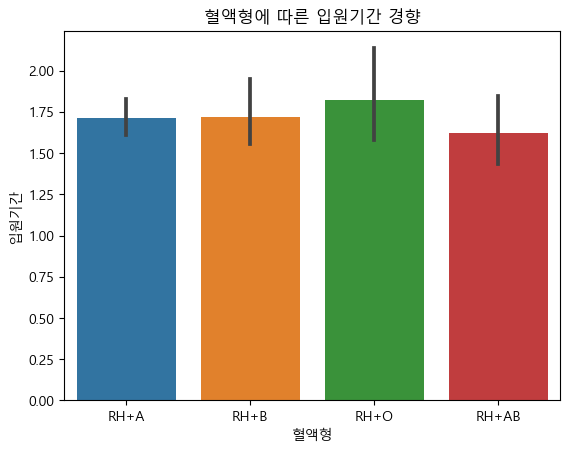

In [53]:
sns.barplot(data=df_ROSF, x='혈액형', y='입원기간')
plt.title('혈액형에 따른 입원기간 경향')

#### 신장,체중-입원기간 or BMI
- 연속-연속/ 범주-연속

In [54]:
df_ROSF[['신장','체중']].describe()

,신장,체중
count,1894.000000,1894.000000
mean,168.027983,68.111140
std,9.211419,11.234318
min,140.000000,35.000000
25%,161.000000,59.700000
50%,169.000000,68.000000
75%,175.000000,75.000000
max,204.000000,136.100000


In [55]:
def convert (height) :
    return float(height)

df_ROSF['신장_소수']=df_ROSF['신장'].apply(convert)

In [56]:
def cm_convert(height):
    height = height / 100
    return height
df_ROSF['신장(m)']= df_ROSF['신장_소수'].apply(cm_convert)
df_ROSF['신장(m)^2'] = df_ROSF['신장(m)'] * df_ROSF['신장(m)']

In [57]:
df_ROSF['BMI'] = df_ROSF['체중'] / df_ROSF['신장(m)^2']

In [58]:
def BMI_calculation(BMI):
    if (BMI) < 23 :
        return '정상체중'
    elif 23 <= (BMI) < 25 :
        return '과체중'
    elif 25 <= (BMI) < 30 :
        return '1단계비만'
    elif 30 <= (BMI) <35 : 
        return '2단계비만'
    elif 35 <= (BMI) : 
        return '고도비만'
    else :
        return '측정이상'

df_ROSF['BMI_범위'] = df_ROSF['BMI'].apply(BMI_calculation)

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


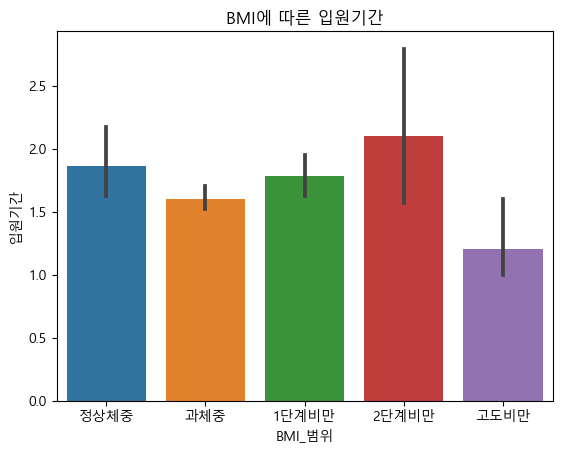

In [59]:
sns.barplot(data=df_ROSF, x='BMI_범위',y='입원기간')
plt.title('BMI에 따른 입원기간')
plt.show()